In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
db_full = pd.read_csv('02-14-2018.csv')

In [3]:
db_full.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
def prepare_data(db):
    categories = {}
    for key, value in enumerate(db_full['Label'].unique()):
        categories[value] = key + 1
    
    db_full['Label'] = db_full['Label'].map(categories)
    
    

In [4]:
categories = {}
for key, value in enumerate(db_full['Label'].unique()):
    categories[value] = key + 1
    
db_full['Category_Label'] = db_full['Label'].map(categories)

In [5]:
#count  = db_full['Category_Label'].value_counts()
#count

<AxesSubplot:title={'center':'Распределение потоков сетевого трафика в датасете'}>

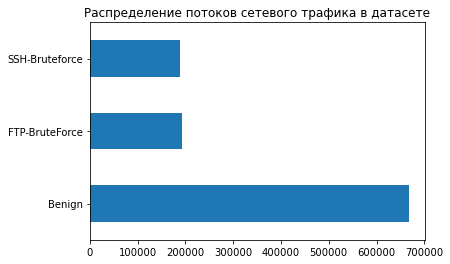

In [6]:
count  = db_full['Category_Label'].value_counts()

count = {"Benign": 667626, "FTP-BruteForce": 193360, "SSH-Bruteforce": 187589}
count = pd.Series(count)
count.plot(kind="barh", title = 'Распределение потоков сетевого трафика в датасете' )

In [7]:
db_full['Label'].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [8]:
#categories = {}
#for key, value in enumerate(db_full['Label'].unique()):
   # categories[value] = key + 1
    
#db_full['Category_Label'] = db_full['Label'].map(categories)

In [9]:

cat_totals = db_full.groupby("Label")['Category_Label'].sum()

In [10]:
cat_totals

Label
Benign            667626
FTP-BruteForce    386720
SSH-Bruteforce    562767
Name: Category_Label, dtype: int64

# 1. Метод отбора признаков с Фильтров

In [11]:
corr_db_full = db_full.corr()

In [12]:
corr_db_full.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Category_Label
Dst Port,1.000000,-0.149786,-0.001213,-0.027925,-0.019058,-0.006846,-0.009166,-0.136013,-0.130417,-0.151811,...,-0.099956,-0.004466,-0.029108,-0.018647,0.001387,-0.001392,-0.000585,-0.000859,-0.024388,-0.234100
Protocol,-0.149786,1.000000,-0.000735,-0.053932,-0.027186,-0.011833,-0.013706,-0.215320,0.848329,0.040990,...,-0.641613,-0.040010,-0.049885,-0.056074,-0.030840,-0.005845,-0.003154,-0.004062,-0.083192,-0.329080
Flow Duration,-0.001213,-0.000735,1.000000,-0.004347,0.002155,0.000315,0.001709,0.005057,-0.001776,0.003074,...,0.000483,0.003740,0.007167,0.006719,0.002392,-0.741625,-0.733106,-0.727972,-0.670767,-0.003390
Tot Fwd Pkts,-0.027925,-0.053932,-0.004347,1.000000,0.884435,0.059293,0.876120,0.157616,-0.047845,0.087371,...,0.009406,0.090445,0.097516,0.122811,0.072095,0.012645,0.011367,0.011825,0.048536,0.029281
Tot Bwd Pkts,-0.019058,-0.027186,0.002155,0.884435,1.000000,0.061203,0.996830,0.091137,-0.024928,0.041858,...,0.001234,0.096751,0.084795,0.120692,0.081173,0.001244,-0.000005,0.000388,0.038149,0.003248


<AxesSubplot:>

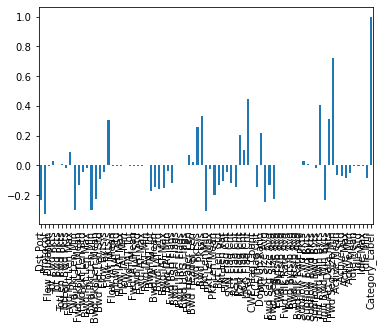

In [13]:
corr_db_full['Category_Label'].plot.bar()

### 1.а Формирование DataFrame с сильными признаками

In [14]:
for par_name, data in corr_db_full['Category_Label'].items():
    if (data >= 0.3) and (data < 1):
        print("par_name:",par_name , "\ndata:",data)
    if (data <= -0.23):
        print("par_name:",par_name , "\ndata:",data)

par_name: Dst Port 
data: -0.23409971391319784
par_name: Protocol 
data: -0.32908001446025736
par_name: Fwd Pkt Len Min 
data: -0.29991945446036755
par_name: Bwd Pkt Len Min 
data: -0.3018038159241152
par_name: Flow Pkts/s 
data: 0.3043681047337297
par_name: Bwd Pkts/s 
data: 0.33551193150231967
par_name: Pkt Len Min 
data: -0.30659632325219893
par_name: URG Flag Cnt 
data: 0.4452599889867894
par_name: Pkt Size Avg 
data: -0.2432147999130297
par_name: Init Fwd Win Byts 
data: 0.40893690799609356
par_name: Fwd Act Data Pkts 
data: 0.3116596446482561
par_name: Fwd Seg Size Min 
data: 0.7204265544731011


In [15]:
cr = corr_db_full
cr = cr.abs().unstack() #Значение берется по модулю
cr = pd.DataFrame(cr).reset_index()
cr.columns = ['f1', 'f2', 'corr']

In [16]:
cr = cr.query('corr >= 0.23 and corr < 1')
cr = cr[cr['f1'] == 'Category_Label']

In [17]:
cr

,f1,f2,corr
6162,Category_Label,Dst Port,0.234100
6163,Category_Label,Protocol,0.329080
6170,Category_Label,Fwd Pkt Len Min,0.299919
6174,Category_Label,Bwd Pkt Len Min,0.301804
6178,Category_Label,Flow Pkts/s,0.304368
6199,Category_Label,Fwd Pkts/s,0.255436
6200,Category_Label,Bwd Pkts/s,0.335512
6201,Category_Label,Pkt Len Min,0.306596
6211,Category_Label,URG Flag Cnt,0.445260
6215,Category_Label,Pkt Size Avg,0.243215


In [18]:
cr.get('f2')

6162             Dst Port
6163             Protocol
6170      Fwd Pkt Len Min
6174      Bwd Pkt Len Min
6178          Flow Pkts/s
6199           Fwd Pkts/s
6200           Bwd Pkts/s
6201          Pkt Len Min
6211         URG Flag Cnt
6215         Pkt Size Avg
6228    Init Fwd Win Byts
6230    Fwd Act Data Pkts
6231     Fwd Seg Size Min
Name: f2, dtype: object

In [19]:
db = db_full[cr['f2']]
db.insert(13, "Category_Label", db_full['Category_Label'], allow_duplicates = False)

In [20]:
db.describe()

,Dst Port,Protocol,Fwd Pkt Len Min,Bwd Pkt Len Min,Flow Pkts/s,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,URG Flag Cnt,Pkt Size Avg,Init Fwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Category_Label
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,8.389535e+00,2.016587e+01,inf,1.413886e+05,1.258575e+05,8.322709e+00,1.211463e-01,7.144445e+01,1.050166e+04,2.793536e+00,2.327970e+01,1.542201e+00
std,1.444344e+04,4.460625e+00,1.948279e+01,4.653823e+01,NaN,3.085265e+05,2.670306e+05,1.890669e+01,3.262974e-01,1.051520e+02,1.293709e+04,5.557106e+00,1.106185e+01,7.784714e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.029761e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.200000e+01,6.000000e+00,0.000000e+00,0.000000e+00,1.671356e+01,9.729304e+00,1.704795e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.410000e+02,0.000000e+00,2.000000e+01,1.000000e+00
50%,5.300000e+01,6.000000e+00,0.000000e+00,0.000000e+00,2.100840e+03,1.026694e+03,6.781981e+01,0.000000e+00,0.000000e+00,4.112500e+01,8.192000e+03,0.000000e+00,2.000000e+01,1.000000e+00
75%,4.430000e+02,6.000000e+00,0.000000e+00,0.000000e+00,2.857143e+05,1.428571e+05,1.111111e+05,0.000000e+00,0.000000e+00,1.047500e+02,2.688300e+04,4.000000e+00,3.200000e+01,2.000000e+00
max,6.553300e+04,1.700000e+01,1.460000e+03,7.320000e+02,inf,4.000000e+06,2.000000e+06,7.880000e+02,1.000000e+00,2.522136e+03,6.553500e+04,1.031000e+03,4.800000e+01,3.000000e+00


<AxesSubplot:>

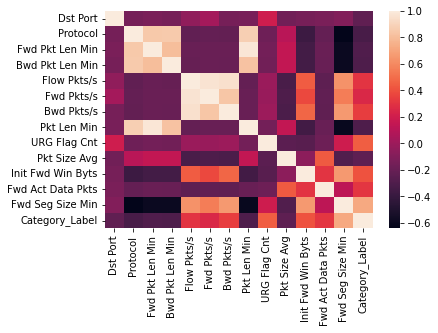

In [21]:
sns.heatmap(db.corr())

In [22]:
db.drop(columns=['Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Flow Pkts/s', 'Fwd Pkts/s']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Bwd Pkts/s         1048575 non-null  float64
 3   Pkt Len Min        1048575 non-null  int64  
 4   URG Flag Cnt       1048575 non-null  int64  
 5   Pkt Size Avg       1048575 non-null  float64
 6   Init Fwd Win Byts  1048575 non-null  int64  
 7   Fwd Act Data Pkts  1048575 non-null  int64  
 8   Fwd Seg Size Min   1048575 non-null  int64  
 9   Category_Label     1048575 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 80.0 MB


In [23]:
db.to_csv('Brut_Cut.csv')

In [24]:
db.columns


Index(['Dst Port', 'Protocol', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min',
       'Flow Pkts/s', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'URG Flag Cnt', 'Pkt Size Avg', 'Init Fwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Category_Label'],
      dtype='object')

In [25]:
data = pd.read_csv('1.csv')


In [26]:
data.head()

,Unnamed: 0,Dst Port,Protocol,Fwd Pkt Len Min,Bwd Pkt Len Min,Flow Pkts/s,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,URG Flag Cnt,Pkt Size Avg,Init Fwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Category_Label
0,0,0,0,0,0,0.026633,0.026633,0.000000,0,0,0.00,-1,0,0,1
1,1,0,0,0,0,0.026633,0.026633,0.000000,0,0,0.00,-1,0,0,1
2,2,0,0,0,0,0.026634,0.026634,0.000000,0,0,0.00,-1,0,0,1
3,3,22,6,0,0,3.873587,2.324152,1.549435,0,0,140.48,65535,6,32,1
4,4,22,6,0,0,2.839597,1.590174,1.249423,0,0,134.08,5808,6,32,1


### 1.б Отбор признаков с использованием встоенных методов 

## Методы отбора признаков <a href = https://waksoft.susu.ru/2021/02/09/otbor-priznakov-s-pomoshhyu-scikit-learn-v-python/>ссылка</a>

In [4]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

X = db_full.select_dtypes(exclude=['object']).copy()
X.drop(columns=['Flow Byts/s', 'Flow Pkts/s', 'Category_Label'],
       axis = 1, inplace=True)
y = db_full['Category_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
X_train.shape, y_train.shape

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

KeyError: "['Category_Label'] not found in axis"

<AxesSubplot:title={'center':'Оценка важности признаков встроенным методом на основе модели случайного леса'}>

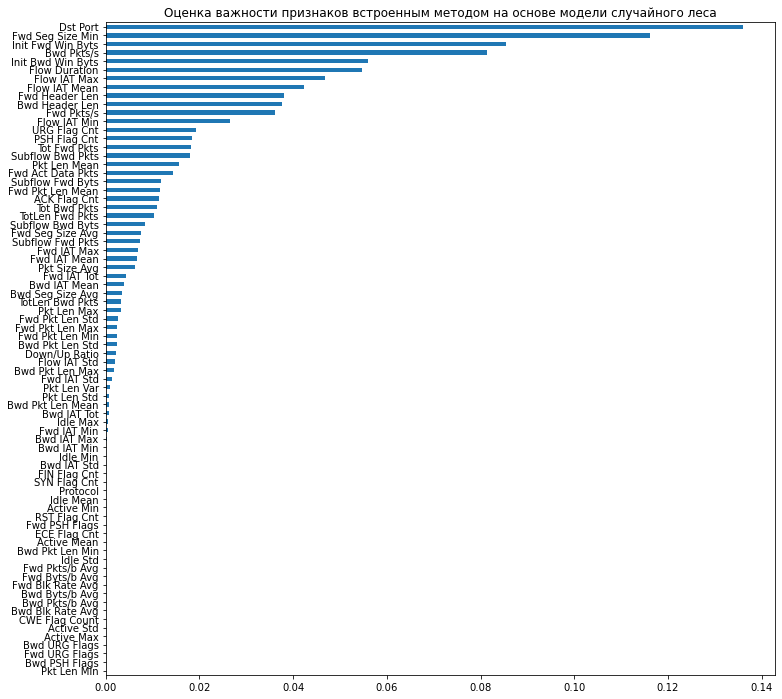

In [112]:
plt.figure(figsize=(12,12))
feat_import = pd.Series(clf.feature_importances_, index=X.columns)
feat_import = feat_import.sort_values(ascending=True)
feat_import.plot(kind="barh", title = 'Оценка важности признаков встроенным методом на основе модели случайного леса' )

In [113]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.99995867413923

In [114]:
%%time
X = db_full[['Fwd Seg Size Min', 'Dst Port', 'Init Fwd Win Byts', 'Bwd Pkts/s', 'Flow Duration', 'Bwd Header Len',
           'Flow IAT Max', 'Flow IAT Mean', 'Fwd Pkts/s', 'Fwd Header Len']]
y = db_full['Category_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
X_train.shape, y_train.shape

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


CPU times: user 50.1 s, sys: 1.05 s, total: 51.1 s
Wall time: 51.9 s


RandomForestClassifier()

<AxesSubplot:title={'center':'Оценка важности признаков встроенным методом на основе модели случайного леса'}>

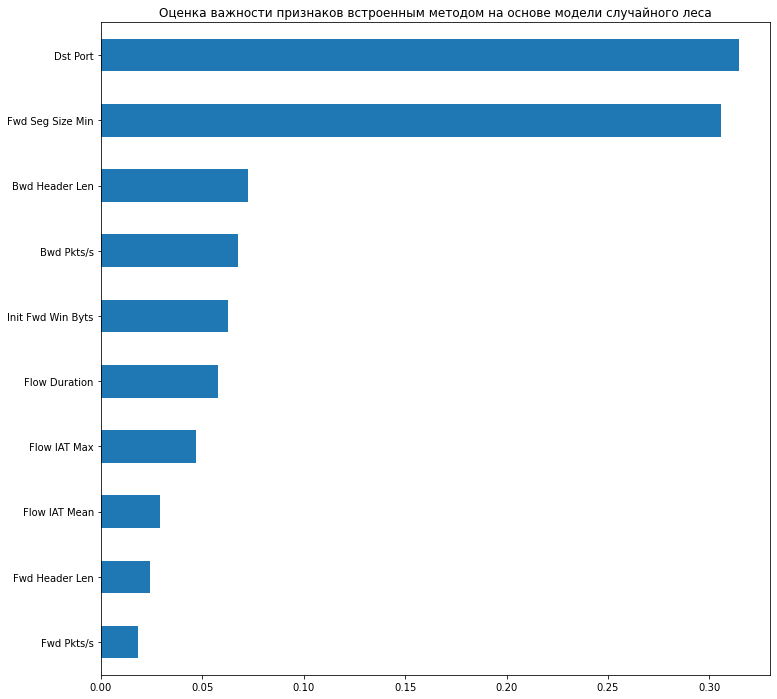

In [115]:
plt.figure(figsize=(12,12))
feat_import = pd.Series(clf.feature_importances_, index=X.columns)
feat_import = feat_import.sort_values(ascending=True)
feat_import.plot(kind="barh", title = 'Оценка важности признаков встроенным методом на основе модели случайного леса' )

In [116]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.99995867413923

# 2. Метод отбора признаков с использованием случайного леса

In [28]:
X.describe()

,Dst Port,Protocol,Fwd Pkt Len Min,Bwd Pkt Len Min,Bwd Pkt Len Mean,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Mean,PSH Flag Cnt,URG Flag Cnt,Down/Up Ratio,Pkt Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,8.389535e+00,2.016587e+01,9.275989e+01,1.413886e+05,1.258575e+05,8.322709e+00,6.311424e+01,5.254312e-01,1.211463e-01,6.634537e-01,7.144445e+01,9.275989e+01,1.050166e+04,6.142295e+03,2.793536e+00,2.327970e+01
std,1.444344e+04,4.460625e+00,1.948279e+01,4.653823e+01,1.579997e+02,3.085265e+05,2.670306e+05,1.890669e+01,1.007340e+02,4.993531e-01,3.262974e-01,5.652833e-01,1.051520e+02,1.579997e+02,1.293709e+04,1.814980e+04,5.557106e+00,1.106185e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.729304e+00,1.704795e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.410000e+02,-1.000000e+00,0.000000e+00,2.000000e+01
50%,5.300000e+01,6.000000e+00,0.000000e+00,0.000000e+00,5.100000e+01,1.026694e+03,6.781981e+01,0.000000e+00,3.655556e+01,1.000000e+00,0.000000e+00,1.000000e+00,4.112500e+01,5.100000e+01,8.192000e+03,0.000000e+00,0.000000e+00,2.000000e+01
75%,4.430000e+02,6.000000e+00,0.000000e+00,0.000000e+00,1.220000e+02,1.428571e+05,1.111111e+05,0.000000e+00,9.820000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.047500e+02,1.220000e+02,2.688300e+04,2.300000e+02,4.000000e+00,3.200000e+01
max,6.553300e+04,1.700000e+01,1.460000e+03,7.320000e+02,1.459240e+03,4.000000e+06,2.000000e+06,7.880000e+02,2.521116e+03,1.000000e+00,1.000000e+00,8.000000e+01,2.522136e+03,1.459240e+03,6.553500e+04,6.553500e+04,1.031000e+03,4.800000e+01


In [30]:
pd.set_option('display.max_columns', None)
X.describe()


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,6.255555e+06,6.206622e+00,7.211191e+00,4.479936e+02,4.521803e+03,1.745736e+02,8.389535e+00,3.879579e+01,5.021107e+01,3.325241e+02,2.016587e+01,9.275989e+01,1.113899e+02,1.583948e+06,2.101497e+06,6.306042e+06,-1.519513e+06,5.944303e+06,1.775583e+06,2.147776e+06,6.081985e+06,-1.475314e+06,5.754843e+06,4.798110e+05,6.049147e+05,1.770279e+06,8.880474e+04,2.659419e-02,0.0,0.0,0.0,1.560079e+02,1.727050e+02,1.413886e+05,1.258575e+05,8.322709e+00,3.375417e+02,6.311424e+01,9.570919e+01,3.092890e+04,3.572467e-03,2.659419e-02,3.960422e-02,5.254312e-01,2.634699e-01,1.211463e-01,0.0,3.960327e-02,6.634537e-01,7.144445e+01,3.879579e+01,9.275989e+01,0.0,0.0,0.0,0.0,0.0,0.0,6.206622e+00,4.479936e+02,7.211191e+00,4.521803e+03,1.050166e+04,6.142295e+03,2.793536e+00,2.327970e+01,5.152449e+04,2.136151e+04,8.789157e+04,3.995477e+04,3.101206e+06,7.297218e+05,4.812391e+06,2.126920e+06
std,1.444344e+04,4.460625e+00,1.260291e+09,4.447851e+01,1.048682e+02,1.573541e+04,1.515021e+05,2.876713e+02,1.948279e+01,5.331882e+01,8.518887e+01,4.938587e+02,4.653823e+01,1.579997e+02,1.860082e+02,3.332477e+08,7.332938e+08,1.530125e+09,1.640806e+09,1.260287e+09,3.332505e+08,7.332951e+08,1.530123e+09,1.640806e+09,2.257935e+07,2.291242e+06,2.612809e+06,7.985050e+06,1.690612e+06,1.608943e-01,0.0,0.0,0.0,1.078119e+03,2.103964e+03,3.085265e+05,2.670306e+05,1.890669e+01,5.023828e+02,1.007340e+02,1.475421e+02,1.170697e+05,5.966329e-02,1.608943e-01,1.950276e-01,4.993531e-01,4.405153e-01,3.262974e-01,0.0,1.950254e-01,5.652833e-01,1.051520e+02,5.331882e+01,1.579997e+02,0.0,0.0,0.0,0.0,0.0,0.0,4.447851e+01,1.573541e+04,1.048682e+02,1.515021e+05,1.293709e+04,1.814980e+04,5.557106e+00,1.106185e+01,5.815586e+05,2.186405e+05,7.395725e+05,5.602693e+05,5.414780e+08,3.820031e+08,1.522117e+09,1.817013e+07
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

In [31]:

feature_importanse = pd.DataFrame(clf.feature_importances_, X.columns)
feature_importanse.head()

,0
Dst Port,0.125953
Protocol,0.000033
Flow Duration,0.038365
Tot Fwd Pkts,0.014735
Tot Bwd Pkts,0.012137


### 2.а Наиболее весомые признакие для Bruteforse

In [32]:
for par_name, data in feature_importanse[0].items():
    if (data >= 0.035) and (data < 1):
        print("par_name:",par_name , "\ndata:",data)

par_name: Dst Port 
data: 0.12595287647133815
par_name: Flow Duration 
data: 0.03836525623580881
par_name: Flow IAT Mean 
data: 0.052232675047797154
par_name: Flow IAT Max 
data: 0.04315160925688038
par_name: Fwd Header Len 
data: 0.03845310929679926
par_name: Fwd Pkts/s 
data: 0.04059033162700929
par_name: Bwd Pkts/s 
data: 0.04797845046798914
par_name: Init Fwd Win Byts 
data: 0.05334040918431997
par_name: Init Bwd Win Byts 
data: 0.04256011159571313
par_name: Fwd Seg Size Min 
data: 0.19258717312197982


## 3. Wrapper methods

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [34]:
train_data = db_full[['Dst Port', 'Flow Duration', 'Flow IAT Mean',
                      'Flow IAT Max', 'Fwd Header Len', 'Bwd Header Len',
                      'Fwd Pkts/s', 'Bwd Pkts/s', 'Init Fwd Win Byts',
                      'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Category_Label']]
train_data = train_data.sample(frac=1).reset_index(drop=True) 

In [ ]:
Y = train_data['Category_Label']
X = train_data.drop(columns='Category_Label')
knn = KNeighborsClassifier(n_neighbors=3)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 37.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 1966.7min finished

[2022-03-18 22:13:12] Features: 1/3 -- score: 0.9996271129866724[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.6min remaining:    0.0s


### Подготовка данных и создание модели

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [37]:
train_data = db_full[['Dst Port', 'Flow Duration', 'Flow IAT Mean',
                      'Flow IAT Max', 'Fwd Header Len', 'Bwd Header Len',
                      'Fwd Pkts/s', 'Bwd Pkts/s', 'Init Fwd Win Byts',
                      'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Category_Label']]
train_data = train_data.sample(frac=1).reset_index(drop=True) 

In [38]:
Y = train_data['Category_Label']
X = train_data.drop(columns='Category_Label')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=6)
X_train.shape, y_train.shape

((734002, 11), (734002,))

In [40]:
first_tree = DecisionTreeClassifier(random_state=5)

In [41]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9999686649522225

### Подбор гиперпараметров

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
tree_params = {'max_depth': np.arange(1,11)}

In [44]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5)

In [45]:
%%time
tree_grid.fit(X_train, y_train);

CPU times: user 47.1 s, sys: 3.5 s, total: 50.6 s
Wall time: 51.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [46]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 4}, 0.9999686649522225)

### Оценка на отлоденной выборке

In [47]:
tree_valid_pred = tree_grid.predict(X_test)

In [48]:
tree_grid.score(X_test, y_test)

0.9999713897886977

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test, tree_valid_pred)

0.9999713897886977